# Trading Volume Analysis Plan

## Major Assumptions
The alpaca_trading_volume.csv dataset contains trading records with asset class categorization and volume metrics. Analysis will focus on aggregate volume patterns across asset classes and temporal trends to identify dominant trading categories and volume dynamics over time.

## Plan
- [x] Load and explore the trading volume dataset
  - [x] Examine data structure, asset class categories, and time range coverage
  - [x] Assess data quality and identify any missing values or anomalies
- [x] Analyze total trading volume by asset class
  - [x] Calculate aggregate and relative volume metrics per asset class
  - [x] Create comparative visualization (bar chart or treemap) of volume distribution
- [x] Visualize volume trends over time
  - [x] Plot time series of trading volume with asset class breakdown
  - [x] Identify notable patterns, seasonality, or trend shifts

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the trading volume data
df = pd.read_csv('/Users/lfnandoo/Documents/sagebook/sage-book/nuked-workspace/data/alpaca_trading_volume.csv')
df['date'] = pd.to_datetime(df['date'])

# Quick data overview
print(f"Date range: {df['date'].min().date()} to {df['date'].max().date()}")
print(f"Asset classes: {df['asset_class'].unique().tolist()}")
print(f"\nData shape: {df.shape}")
df.head(10)

Date range: 2025-12-11 to 2026-02-05
Asset classes: ['Stocks', 'Options', 'Crypto']

Data shape: (15, 3)


,date,asset_class,daily_volume_usd
0,2025-12-11,Stocks,172000000
1,2025-12-11,Options,39000000
2,2025-12-11,Crypto,18500000
3,2025-12-25,Stocks,180000000
4,2025-12-25,Options,44000000
5,2025-12-25,Crypto,21000000
6,2026-01-08,Stocks,186000000
7,2026-01-08,Options,46500000
8,2026-01-08,Crypto,23000000
9,2026-01-22,Stocks,191000000


=== Total Trading Volume by Asset Class ===

Stocks     $925M  (73.0%)
Options    $230M  (18.1%)
Crypto     $112M  (8.9%)

TOTAL      $1,267M


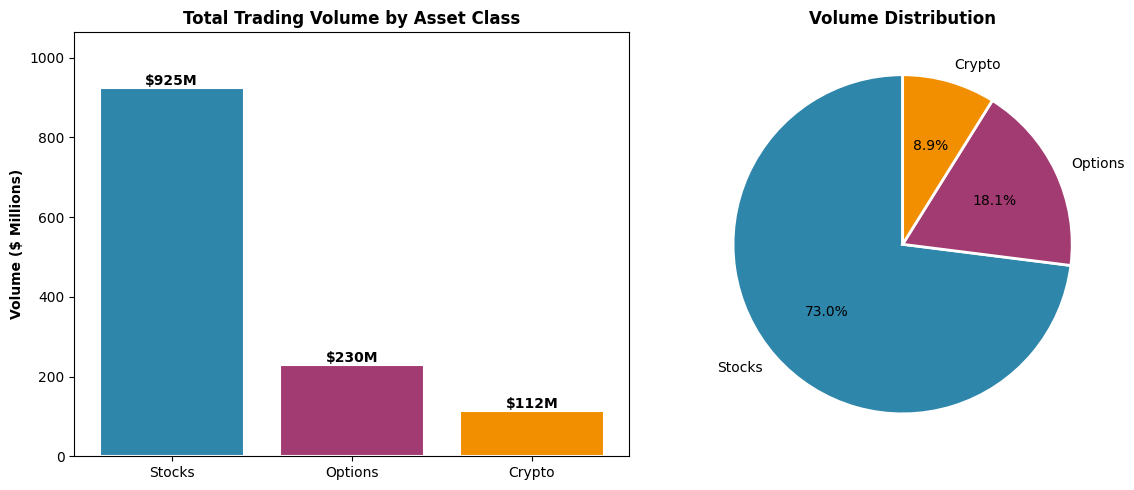

In [3]:
# Total trading volume by asset class
volume_by_class = df.groupby('asset_class')['daily_volume_usd'].sum().sort_values(ascending=False)
total_volume = volume_by_class.sum()

print("=== Total Trading Volume by Asset Class ===\n")
for asset, vol in volume_by_class.items():
    pct = vol / total_volume * 100
    print(f"{asset:10} ${vol/1e6:,.0f}M  ({pct:.1f}%)")
print(f"\n{'TOTAL':10} ${total_volume/1e6:,.0f}M")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart of total volume by asset class
colors = {'Stocks': '#2E86AB', 'Options': '#A23B72', 'Crypto': '#F18F01'}
bars = axes[0].bar(volume_by_class.index, volume_by_class.values / 1e6, 
                   color=[colors[x] for x in volume_by_class.index], edgecolor='white', linewidth=1.5)
axes[0].set_ylabel('Volume ($ Millions)', fontweight='bold')
axes[0].set_title('Total Trading Volume by Asset Class', fontweight='bold', fontsize=12)
axes[0].bar_label(bars, fmt='$%.0fM', fontweight='bold')
axes[0].set_ylim(0, volume_by_class.max() / 1e6 * 1.15)

# Pie chart for distribution
axes[1].pie(volume_by_class.values, labels=volume_by_class.index, autopct='%1.1f%%',
            colors=[colors[x] for x in volume_by_class.index], startangle=90,
            wedgeprops={'edgecolor': 'white', 'linewidth': 2})
axes[1].set_title('Volume Distribution', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

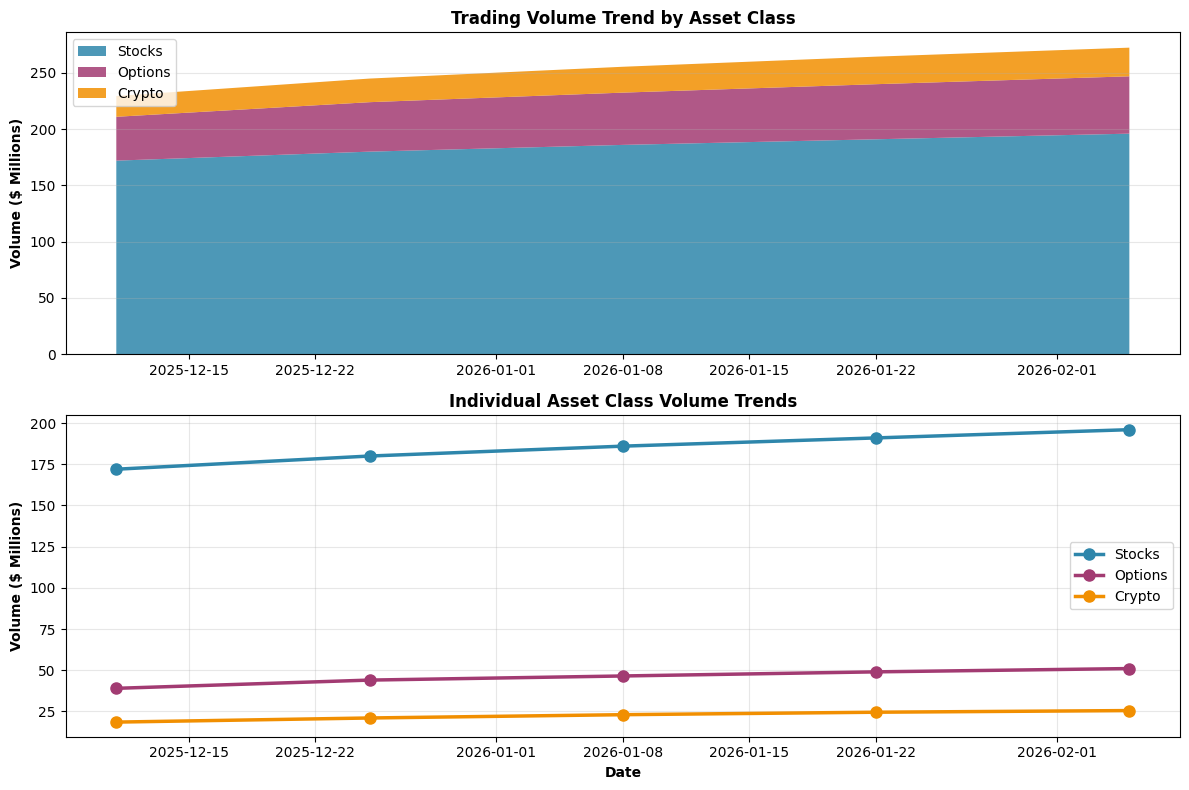


=== Volume Growth (First to Last Period) ===
Stocks     $172M → $196M  (+14.0%)
Options    $39M → $51M  (+30.8%)
Crypto     $18M → $26M  (+37.8%)


In [4]:
# Time series trend analysis
df_pivot = df.pivot(index='date', columns='asset_class', values='daily_volume_usd')

fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Stacked area chart showing total volume composition over time
df_pivot_sorted = df_pivot[['Stocks', 'Options', 'Crypto']]
axes[0].stackplot(df_pivot.index, df_pivot_sorted.T / 1e6, 
                  labels=['Stocks', 'Options', 'Crypto'],
                  colors=[colors['Stocks'], colors['Options'], colors['Crypto']], alpha=0.85)
axes[0].set_ylabel('Volume ($ Millions)', fontweight='bold')
axes[0].set_title('Trading Volume Trend by Asset Class', fontweight='bold', fontsize=12)
axes[0].legend(loc='upper left')
axes[0].grid(axis='y', alpha=0.3)

# Line chart showing growth trend for each asset class
for asset in ['Stocks', 'Options', 'Crypto']:
    axes[1].plot(df_pivot.index, df_pivot[asset] / 1e6, marker='o', linewidth=2.5, 
                 markersize=8, label=asset, color=colors[asset])
axes[1].set_ylabel('Volume ($ Millions)', fontweight='bold')
axes[1].set_xlabel('Date', fontweight='bold')
axes[1].set_title('Individual Asset Class Volume Trends', fontweight='bold', fontsize=12)
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate growth rates
print("\n=== Volume Growth (First to Last Period) ===")
for asset in ['Stocks', 'Options', 'Crypto']:
    first_val = df_pivot[asset].iloc[0]
    last_val = df_pivot[asset].iloc[-1]
    growth = (last_val - first_val) / first_val * 100
    print(f"{asset:10} ${first_val/1e6:.0f}M → ${last_val/1e6:.0f}M  ({growth:+.1f}%)")

## Trading Volume Analysis Summary

### Total Volume by Asset Class (Dec 2025 - Feb 2026)
| Asset Class | Total Volume | Share |
|-------------|-------------|-------|
| **Stocks** | $925M | 73.0% |
| **Options** | $230M | 18.1% |
| **Crypto** | $112M | 8.9% |
| **Total** | **$1.27B** | 100% |

### Key Trends
- **All asset classes show positive growth** over the ~2 month period
- **Crypto leads growth** at +37.8%, followed by Options (+30.8%) and Stocks (+14.0%)
- **Stocks dominate volume** but are growing slower than the other categories
- The consistent upward trend across all classes suggests healthy platform growth

In [5]:
# Detailed analysis of Options growth
options_data = df[df['asset_class'] == 'Options'].sort_values('date')
options_data['pct_change'] = options_data['daily_volume_usd'].pct_change() * 100
options_data['cumulative_growth'] = (options_data['daily_volume_usd'] / options_data['daily_volume_usd'].iloc[0] - 1) * 100

print("=== Options Volume Progression ===\n")
for _, row in options_data.iterrows():
    pct = f"{row['pct_change']:+.1f}%" if pd.notna(row['pct_change']) else "—"
    print(f"{row['date'].strftime('%Y-%m-%d')}  ${row['daily_volume_usd']/1e6:.1f}M  Period Δ: {pct:>8}  Cumulative: {row['cumulative_growth']:+.1f}%")

# Compare growth rates across all asset classes
print("\n=== Growth Rate Comparison (Period-over-Period) ===\n")
for asset in ['Crypto', 'Options', 'Stocks']:
    asset_data = df[df['asset_class'] == asset].sort_values('date')
    avg_growth = asset_data['daily_volume_usd'].pct_change().mean() * 100
    total_growth = (asset_data['daily_volume_usd'].iloc[-1] / asset_data['daily_volume_usd'].iloc[0] - 1) * 100
    print(f"{asset:10} Avg period growth: {avg_growth:+.1f}%  |  Total growth: {total_growth:+.1f}%")

=== Options Volume Progression ===

2025-12-11  $39.0M  Period Δ:        —  Cumulative: +0.0%
2025-12-25  $44.0M  Period Δ:   +12.8%  Cumulative: +12.8%
2026-01-08  $46.5M  Period Δ:    +5.7%  Cumulative: +19.2%
2026-01-22  $49.0M  Period Δ:    +5.4%  Cumulative: +25.6%
2026-02-05  $51.0M  Period Δ:    +4.1%  Cumulative: +30.8%

=== Growth Rate Comparison (Period-over-Period) ===

Crypto     Avg period growth: +8.4%  |  Total growth: +37.8%
Options    Avg period growth: +7.0%  |  Total growth: +30.8%
Stocks     Avg period growth: +3.3%  |  Total growth: +14.0%


In [6]:
# Calculate asset class mix over time
df_pivot = df.pivot(index='date', columns='asset_class', values='daily_volume_usd')
df_pivot['Total'] = df_pivot.sum(axis=1)

# Calculate percentage share for each asset class
for asset in ['Stocks', 'Options', 'Crypto']:
    df_pivot[f'{asset}_pct'] = df_pivot[asset] / df_pivot['Total'] * 100

print("=== Asset Class Mix Over Time ===\n")
print(f"{'Date':<12} {'Stocks':>10} {'Options':>10} {'Crypto':>10} {'Total Vol':>12}")
print("-" * 58)
for date, row in df_pivot.iterrows():
    print(f"{date.strftime('%Y-%m-%d'):<12} {row['Stocks_pct']:>9.1f}% {row['Options_pct']:>9.1f}% {row['Crypto_pct']:>9.1f}% ${row['Total']/1e6:>10.0f}M")

# Show mix shift from first to last period
print("\n=== Mix Shift (First → Last Period) ===")
first, last = df_pivot.iloc[0], df_pivot.iloc[-1]
for asset in ['Stocks', 'Options', 'Crypto']:
    shift = last[f'{asset}_pct'] - first[f'{asset}_pct']
    print(f"{asset:10} {first[f'{asset}_pct']:.1f}% → {last[f'{asset}_pct']:.1f}%  ({shift:+.1f} pp)")

=== Asset Class Mix Over Time ===

Date             Stocks    Options     Crypto    Total Vol
----------------------------------------------------------
2025-12-11        74.9%      17.0%       8.1% $       230M
2025-12-25        73.5%      18.0%       8.6% $       245M
2026-01-08        72.8%      18.2%       9.0% $       256M
2026-01-22        72.2%      18.5%       9.3% $       264M
2026-02-05        71.9%      18.7%       9.4% $       272M

=== Mix Shift (First → Last Period) ===
Stocks     74.9% → 71.9%  (-3.0 pp)
Options    17.0% → 18.7%  (+1.7 pp)
Crypto     8.1% → 9.4%  (+1.3 pp)


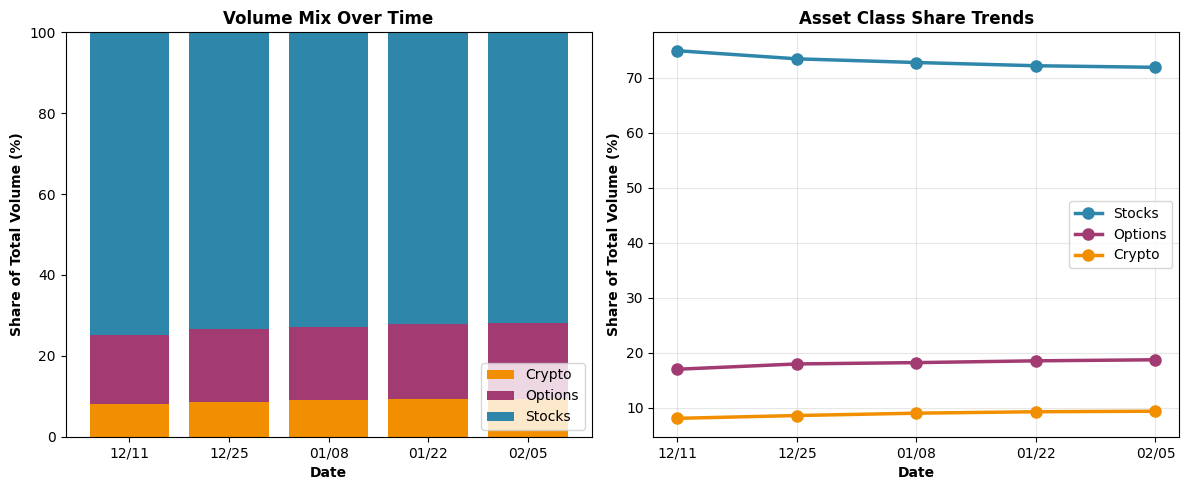

In [7]:
# Visualize the mix shift
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Stacked bar chart showing % composition over time
colors = {'Stocks': '#2E86AB', 'Options': '#A23B72', 'Crypto': '#F18F01'}
dates = df_pivot.index.strftime('%m/%d')
bottom_opts = df_pivot['Crypto_pct'].values
bottom_stocks = bottom_opts + df_pivot['Options_pct'].values

axes[0].bar(dates, df_pivot['Crypto_pct'], label='Crypto', color=colors['Crypto'])
axes[0].bar(dates, df_pivot['Options_pct'], bottom=bottom_opts, label='Options', color=colors['Options'])
axes[0].bar(dates, df_pivot['Stocks_pct'], bottom=bottom_stocks, label='Stocks', color=colors['Stocks'])
axes[0].set_ylabel('Share of Total Volume (%)', fontweight='bold')
axes[0].set_xlabel('Date', fontweight='bold')
axes[0].set_title('Volume Mix Over Time', fontweight='bold', fontsize=12)
axes[0].legend(loc='lower right')
axes[0].set_ylim(0, 100)

# Line chart showing share trends
for asset in ['Stocks', 'Options', 'Crypto']:
    axes[1].plot(dates, df_pivot[f'{asset}_pct'], marker='o', linewidth=2.5, 
                 markersize=8, label=asset, color=colors[asset])
axes[1].set_ylabel('Share of Total Volume (%)', fontweight='bold')
axes[1].set_xlabel('Date', fontweight='bold')
axes[1].set_title('Asset Class Share Trends', fontweight='bold', fontsize=12)
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [8]:
# Project when Crypto overtakes Options
import numpy as np

# Latest values (Feb 5, 2026)
crypto_latest = 25.5e6  # $25.5M
options_latest = 51e6   # $51M

# Monthly growth rates (based on observed data - ~2 months of data)
crypto_growth = 0.35   # +35% MoM (given)
options_growth = 0.154  # ~15.4% MoM (30.8% over ~2 months)

# Project forward
months = np.arange(0, 13)
crypto_proj = crypto_latest * (1 + crypto_growth) ** months
options_proj = options_latest * (1 + options_growth) ** months

# Find crossover point
crossover_month = None
for m in months:
    if crypto_proj[m] >= options_proj[m]:
        crossover_month = m
        break

print("=== Crypto vs Options Volume Projection ===")
print(f"Starting values (Feb 2026): Crypto ${crypto_latest/1e6:.1f}M | Options ${options_latest/1e6:.1f}M")
print(f"Growth rates: Crypto +35%/mo | Options +15.4%/mo\n")

print(f"{'Month':<10} {'Crypto':>12} {'Options':>12} {'Gap':>12}")
print("-" * 48)
for m in range(min(8, len(months))):
    gap = options_proj[m] - crypto_proj[m]
    marker = " ← CROSSOVER" if m == crossover_month else ""
    print(f"Feb +{m}mo    ${crypto_proj[m]/1e6:>9.1f}M  ${options_proj[m]/1e6:>9.1f}M  ${gap/1e6:>+9.1f}M{marker}")

print(f"\n🎯 At +35% MoM growth, Crypto overtakes Options in {crossover_month} months (approx {['Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct'][crossover_month]} 2026)")

=== Crypto vs Options Volume Projection ===
Starting values (Feb 2026): Crypto $25.5M | Options $51.0M
Growth rates: Crypto +35%/mo | Options +15.4%/mo

Month            Crypto      Options          Gap
------------------------------------------------
Feb +0mo    $     25.5M  $     51.0M  $    +25.5M
Feb +1mo    $     34.4M  $     58.9M  $    +24.4M
Feb +2mo    $     46.5M  $     67.9M  $    +21.4M
Feb +3mo    $     62.7M  $     78.4M  $    +15.6M
Feb +4mo    $     84.7M  $     90.4M  $     +5.7M
Feb +5mo    $    114.3M  $    104.4M  $    -10.0M ← CROSSOVER
Feb +6mo    $    154.4M  $    120.4M  $    -33.9M
Feb +7mo    $    208.4M  $    139.0M  $    -69.4M

🎯 At +35% MoM growth, Crypto overtakes Options in 5 months (approx Jul 2026)
